# Real Estate Price Prediction

In [48]:
# Required Liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset

real_estate_data = pd.read_csv("Real_Estate.csv")

In [65]:
# Display the first few rows of the dataset and the info about the dataset

real_estate_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [12]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [35]:
# Convert 'Transaction date' to datetime format

real_estate_data['Transaction date'] = pd.to_datetime(real_estate_data['Transaction date'])

The dataset contains 7 columns. Here’s a brief overview of the columns:

1) Transaction date: The date of the real estate transaction.
2) House age: Age of the house in years.
3) Distance to the nearest MRT station: Distance to the nearest Mass Rapid Transit station in meters.
4) Number of convenience stores: Number of convenience stores in the vicinity.
5) Latitude: Latitude of the property location.
6) Longitude: Longitude of the property location.
7) House price of unit area: House price of unit area.

In [36]:
# if the data contains any null values or not:
real_estate_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

There are no null values in the dataset

In [37]:
# descriptive statistics

real_estate_data.describe()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013-02-13 03:16:11.247379200,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
min,2012-09-02 16:42:30.519336,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,2012-11-21 03:54:22.174344448,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,2013-02-12 00:48:02.949638400,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,2013-05-02 09:55:51.372080640,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,2013-08-01 09:49:41.506402,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716
std,NaN,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935


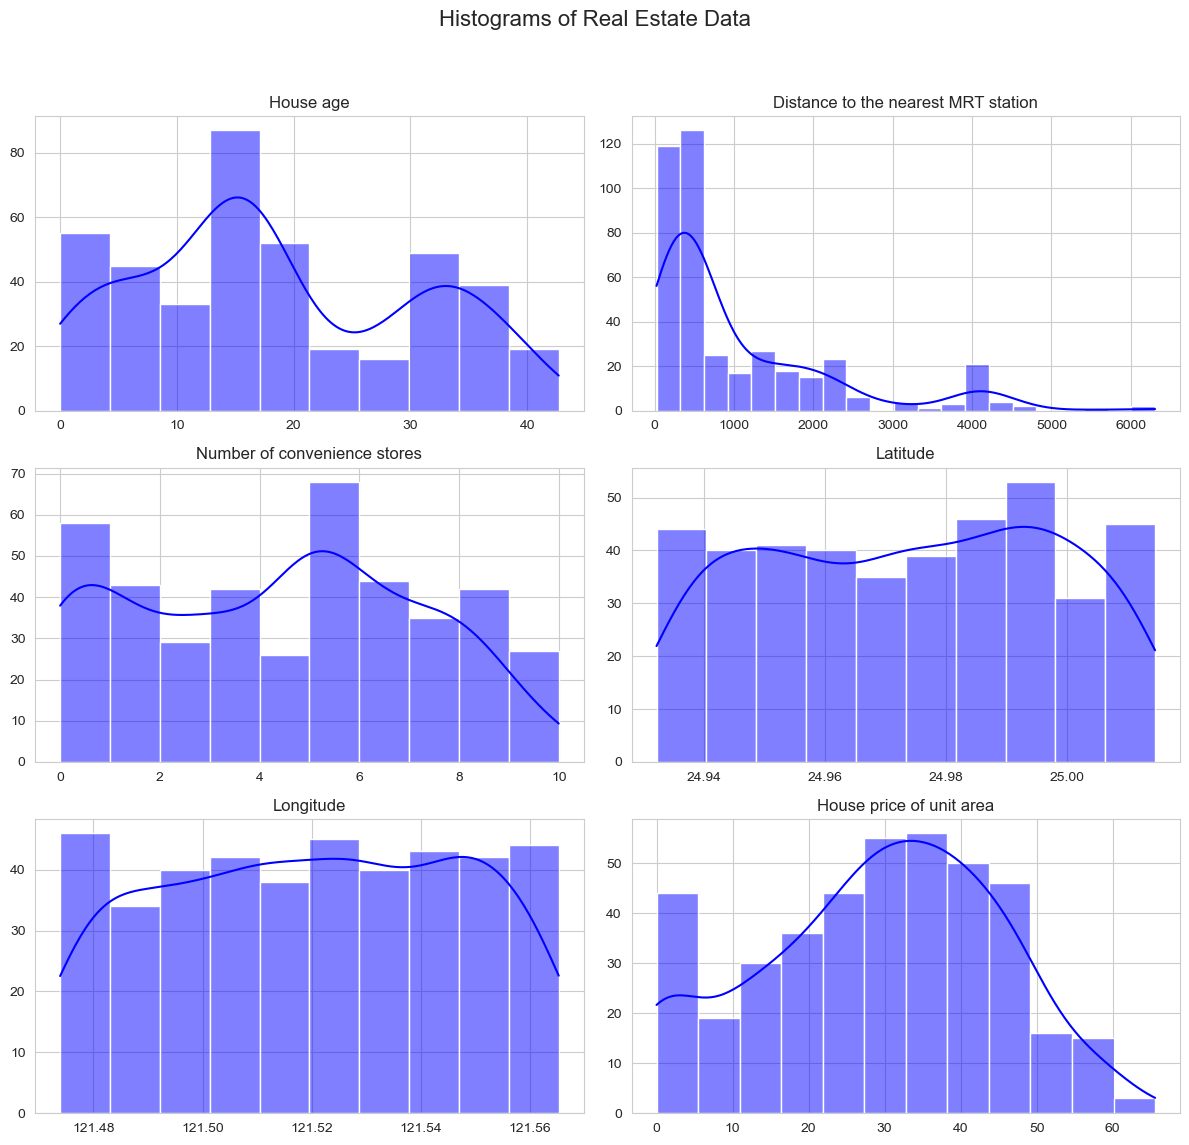

In [38]:
# Plot histograms of numerical features with custom bar color

sns.set_style("whitegrid")
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

for ax, col in zip(axes.flat, cols):
    sns.histplot(real_estate_data[col], kde=True, ax=ax, color='blue')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The histograms provide insights into the distribution of each variable:

* House Age: This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age).
* Distance to the Nearest MRT Station: Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.
* Number of Convenience Stores: Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability.
* Latitude and Longitude: Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.
* House Price of Unit Area: Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.

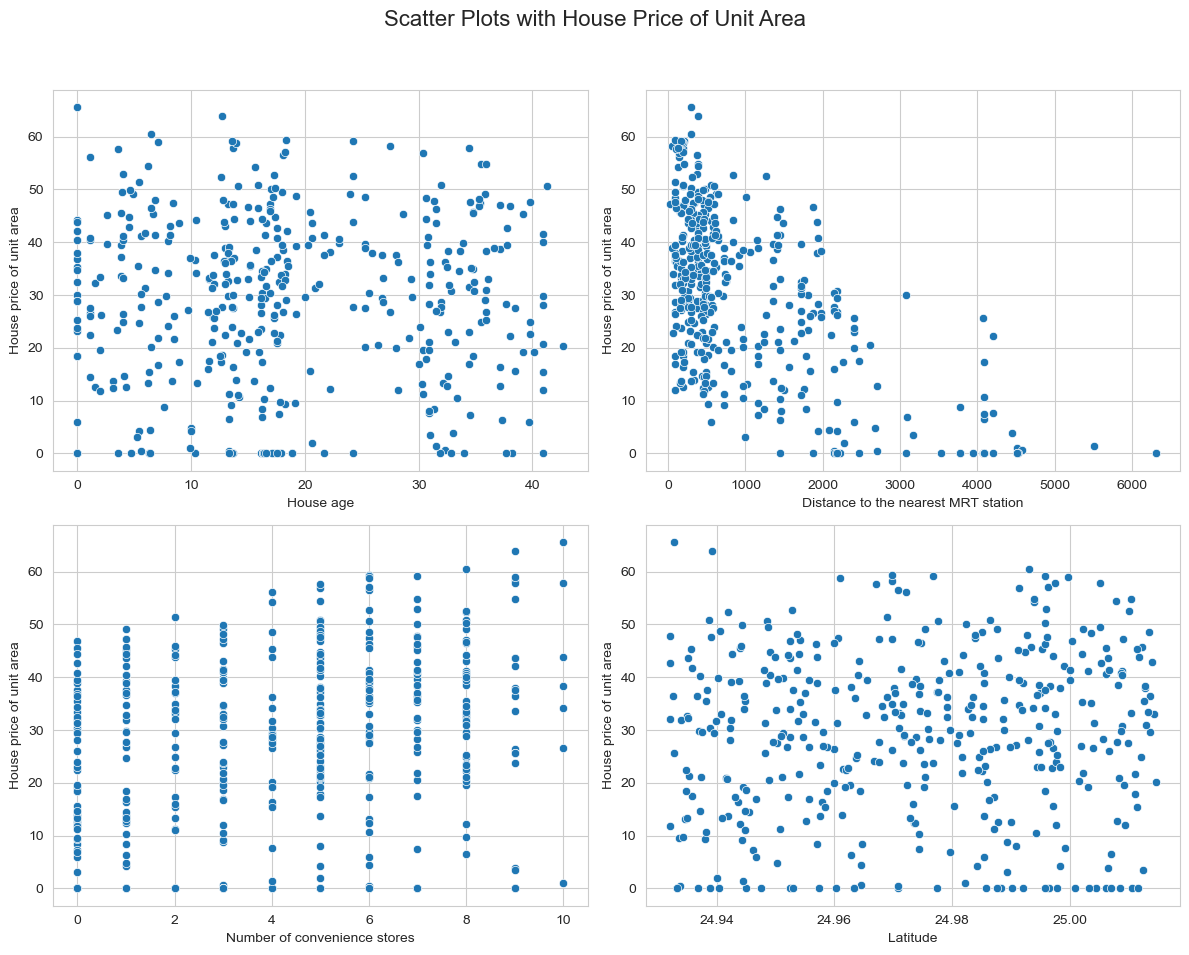

In [39]:
# scatter plots to explore the relationships between these variables and the house price.
# It will help us understand which factors might be influencing property prices more significantly

# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The scatter plots revealed interesting relationships between various factors and house prices:

1) House Age vs. House Price: There doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices.
2) Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggests a strong negative relationship between these two variables.
3) Number of Convenience Stores vs. House Price: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.
4) Latitude vs. House Price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or lower house prices. It could be indicative of specific neighbourhoods being more desirable.

In [40]:
real_estate_data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


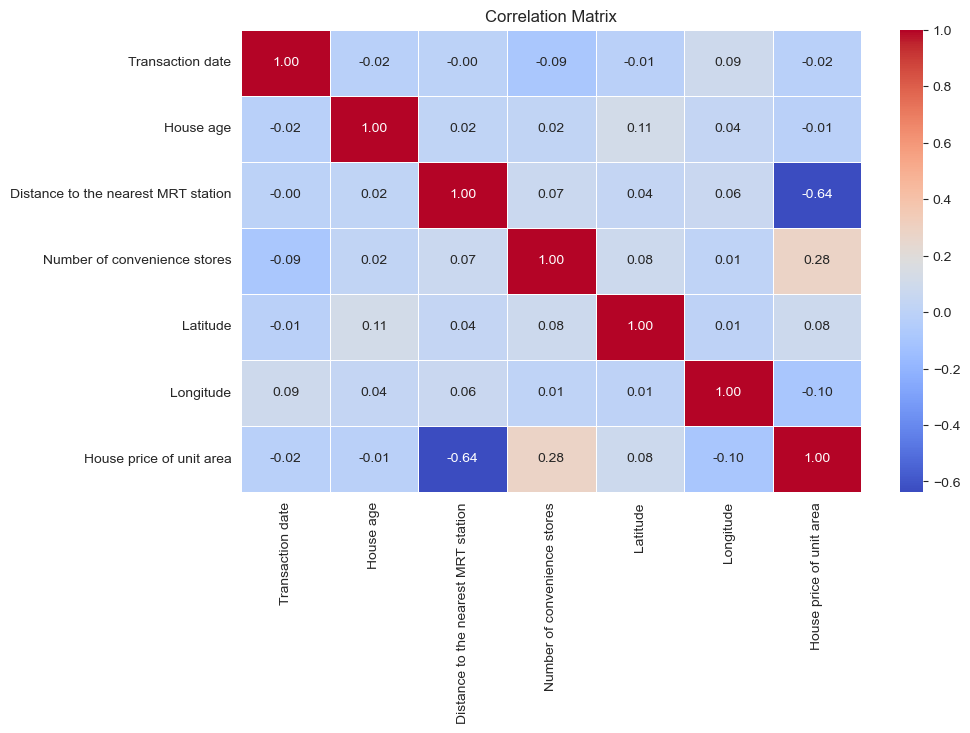

                                     Transaction date  House age  \
Transaction date                             1.000000  -0.020135   
House age                                   -0.020135   1.000000   
Distance to the nearest MRT station         -0.001400   0.021596   
Number of convenience stores                -0.088155   0.021973   
Latitude                                    -0.011480   0.114345   
Longitude                                    0.091629   0.036449   
House price of unit area                    -0.017975  -0.012284   

                                     Distance to the nearest MRT station  \
Transaction date                                               -0.001400   
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   

In [43]:
# correlation analysis

correlation_matrix = real_estate_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the house price:


1) House Age: This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset.
2) Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.
3) Number of Convenience Stores: Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.
4) Latitude and Longitude: Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).

Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price.

In [44]:
real_estate_data.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [63]:
# Build a regression model to predict the real estate prices

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions using the linear regression model
y_pred = model.predict(X_test)

Now, let’s visualize the actual versus predicted values to assess how well our model is performing:

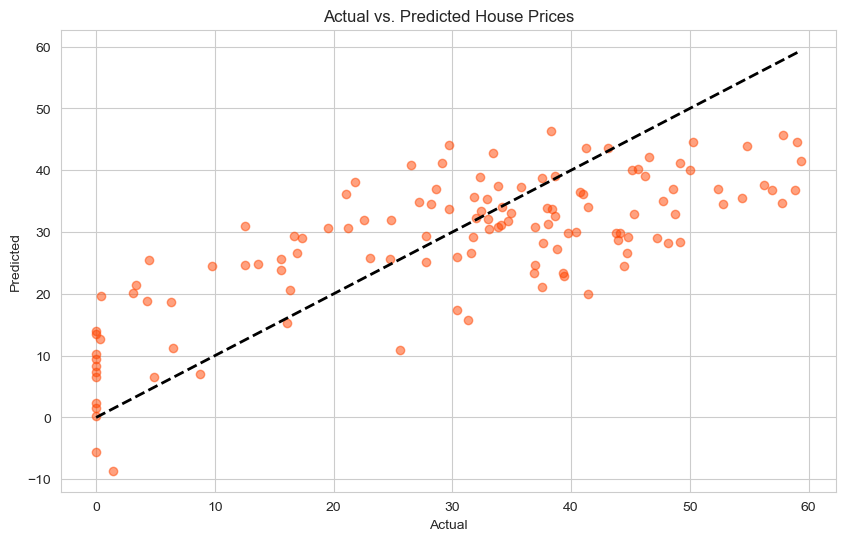

In [64]:
# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='orangered')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

The diagonal dashed line represents where the actual and predicted values would be equal. Points close to this line indicate accurate predictions. From the plot, we can observe:

Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.
Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.
So, this is how we can predict real estate prices with Machine Learning using Python.

### Summary

Real Estate Price Prediction is the process of estimating or forecasting the future prices of real estate properties, such as houses, apartments, or commercial buildings. The goal is to provide accurate property rates to buyers, sellers, investors, and real estate professionals to make informed decisions about real estate transactions. I hope you liked this article on Real Estate Price Prediction with Machine Learning using Python.